In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
kick = pd.read_excel('../Assignments/assognment_4/kickstarter.xlsx')

In [10]:
kick.head(3)

,ID,Name,Blurb,Goal,Pledged,Status,Launch Date,Deadline,Staff Pick,Backers Count,Creator,City,State,Category,Subcategory,URLs
0,18520,Grandma's are Life,Raising money to help my grandmother recover f...,15000.0,62.0,failed,2016-10-19 08:32:40,2016-11-18 09:32:40,False,4,https://www.kickstarter.com/profile/1501687606,Cleveland,OH,music,world music,"{""web"":{""project"":""https://www.kickstarter.com..."
1,24380,Puss N' Books: A relaxing cat cafe and bookstore.,A sanctuary for humans and felines alike! Come...,20000.0,776.0,failed,2015-10-27 10:25:33,2015-11-26 11:25:33,False,18,https://www.kickstarter.com/profile/920978851,Bloomington,IL,food,spaces,"{""web"":{""project"":""https://www.kickstarter.com..."
2,39409,WHILE THE TREES SLEEP,CalArts thesis film inspired by true events su...,10500.0,11545.0,successful,2011-07-20 14:28:17,2011-08-19 14:28:17,False,66,https://www.kickstarter.com/profile/emiliesabath,Columbia,MO,film & video,shorts,"{""web"":{""project"":""https://www.kickstarter.com..."


In [11]:
kick.dtypes

ID                        int64
Name                     object
Blurb                    object
Goal                    float64
Pledged                 float64
Status                   object
Launch Date      datetime64[ns]
Deadline         datetime64[ns]
Staff Pick                 bool
Backers Count             int64
Creator                  object
City                     object
State                    object
Category                 object
Subcategory              object
URLs                     object
dtype: object

In [12]:
kick['Status'].value_counts()

Status
successful    51544
failed        51273
canceled       6934
live           1764
suspended       422
Name: count, dtype: int64

In [13]:
sample = kick.loc[(kick['Status'] == 'successful') |
                  (kick['Status'] == 'failed')].copy()

In [14]:
sample.describe()

,ID,Goal,Pledged,Launch Date,Deadline,Backers Count
count,1.028170e+05,1.028170e+05,1.028170e+05,102817,102817,102817.000000
mean,1.076106e+09,3.706169e+04,1.327916e+04,2014-04-26 04:51:22.372273152,2014-05-29 21:47:42.894073856,157.930566
min,1.852000e+04,1.000000e-02,0.000000e+00,2009-04-29 15:08:13,2009-05-31 19:20:00,0.000000
25%,5.391611e+08,2.000000e+03,7.500000e+01,2013-01-24 20:02:58,2013-02-26 01:38:53,3.000000
50%,1.080458e+09,5.000000e+03,1.304000e+03,2014-08-30 11:54:38,2014-10-02 22:59:00,23.000000
75%,1.611729e+09,1.500000e+04,6.015000e+03,2015-08-03 01:04:08,2015-09-04 10:00:02,81.000000
max,2.147476e+09,1.000000e+08,2.033899e+07,2016-12-06 15:29:21,2016-12-15 21:02:59,219382.000000
std,6.195257e+08,8.740204e+05,1.357438e+05,NaN,NaN,1456.242039


In [15]:
# log transformation
np.log(	1.000000e+08)

18.420680743952367

In [20]:
sample['loggoal'] = 0
sample['loggoal'].mask(sample['Goal'] != 0, 
                       np.log(sample['Goal']), inplace= True)

sample['loggledged'] = 0
sample['loggledged'].mask(sample['Pledged'] != 0, 
                       np.log(sample['Pledged']), inplace= True)

sample['logbacker'] = 0
sample['logbacker'].mask(sample['Backers Count'] != 0, 
                       np.log(sample['Backers Count']), inplace= True)

C:\Users\ZZZのwlkq\AppData\Local\Temp\ipykernel_23108\2885926301.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 9.61580548  9.90348755  9.25913054 ...  6.62007321  9.79812704
 11.22524339]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample['loggoal'].mask(sample['Goal'] != 0,
c:\Users\ZZZのwlkq\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZZZのwlkq\AppData\Local\Temp\ipykernel_23108\2885926301.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 4.12713439  6.65415252  9.35400772 ...  6.81892407  9.83937561
 12.62524998]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sample['loggledged'].mask(sample[

In [21]:
sample.describe()

,ID,Goal,Pledged,Launch Date,Deadline,Backers Count,locgoal,loggledged,logbacker,loggoal
count,1.028170e+05,1.028170e+05,1.028170e+05,102817,102817,102817.000000,102817.000000,102817.000000,102817.000000,102817.000000
mean,1.076106e+09,3.706169e+04,1.327916e+04,2014-04-26 04:51:22.372273152,2014-05-29 21:47:42.894073856,157.930566,8.550973,6.311334,2.910394,8.550973
min,1.852000e+04,1.000000e-02,0.000000e+00,2009-04-29 15:08:13,2009-05-31 19:20:00,0.000000,-4.605170,0.000000,0.000000,-4.605170
25%,5.391611e+08,2.000000e+03,7.500000e+01,2013-01-24 20:02:58,2013-02-26 01:38:53,3.000000,7.600902,4.317488,1.098612,7.600902
50%,1.080458e+09,5.000000e+03,1.304000e+03,2014-08-30 11:54:38,2014-10-02 22:59:00,23.000000,8.517193,7.173192,3.135494,8.517193
75%,1.611729e+09,1.500000e+04,6.015000e+03,2015-08-03 01:04:08,2015-09-04 10:00:02,81.000000,9.615805,8.702012,4.394449,9.615805
max,2.147476e+09,1.000000e+08,2.033899e+07,2016-12-06 15:29:21,2016-12-15 21:02:59,219382.000000,18.420681,16.828050,12.298570,18.420681
std,6.195257e+08,8.740204e+05,1.357438e+05,NaN,NaN,1456.242039,1.639136,3.309863,2.052429,1.639136


In [22]:
sample['Status'].value_counts()

Status
successful    51544
failed        51273
Name: count, dtype: int64

In [26]:
sample['numstatus'] = 0
sample['numstatus'].mask(sample['Status'] == 'successful',
                         1, inplace=True)

In [27]:
sample.head()

,ID,Name,Blurb,Goal,Pledged,Status,Launch Date,Deadline,Staff Pick,Backers Count,...,City,State,Category,Subcategory,URLs,locgoal,loggledged,logbacker,loggoal,numstatus
0,18520,Grandma's are Life,Raising money to help my grandmother recover f...,15000.0,62.0,failed,2016-10-19 08:32:40,2016-11-18 09:32:40,False,4,...,Cleveland,OH,music,world music,"{""web"":{""project"":""https://www.kickstarter.com...",9.615805,4.127134,1.386294,9.615805,0
1,24380,Puss N' Books: A relaxing cat cafe and bookstore.,A sanctuary for humans and felines alike! Come...,20000.0,776.0,failed,2015-10-27 10:25:33,2015-11-26 11:25:33,False,18,...,Bloomington,IL,food,spaces,"{""web"":{""project"":""https://www.kickstarter.com...",9.903488,6.654153,2.890372,9.903488,0
2,39409,WHILE THE TREES SLEEP,CalArts thesis film inspired by true events su...,10500.0,11545.0,successful,2011-07-20 14:28:17,2011-08-19 14:28:17,False,66,...,Columbia,MO,film & video,shorts,"{""web"":{""project"":""https://www.kickstarter.com...",9.259131,9.354008,4.189655,9.259131,1
3,53154,Swim (Feature Film),A feature film about a young girl raising her ...,3200.0,3230.0,successful,2013-06-03 11:58:07,2013-07-03 11:58:07,False,38,...,Philadelphia,PA,film & video,narrative film,"{""web"":{""project"":""https://www.kickstarter.com...",8.070906,8.080237,3.637586,8.070906,1
4,113230,REBIRTH,An ambitious corporate man discovers his compa...,15644.0,15779.0,successful,2014-05-07 08:27:16,2014-06-06 08:27:16,False,44,...,New York,NY,film & video,science fiction,"{""web"":{""project"":""https://www.kickstarter.com...",9.657843,9.666435,3.784190,9.657843,1


In [28]:
sample['numstatus'].describe()

count    102817.000000
mean          0.501318
std           0.500001
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: numstatus, dtype: float64

# histogram

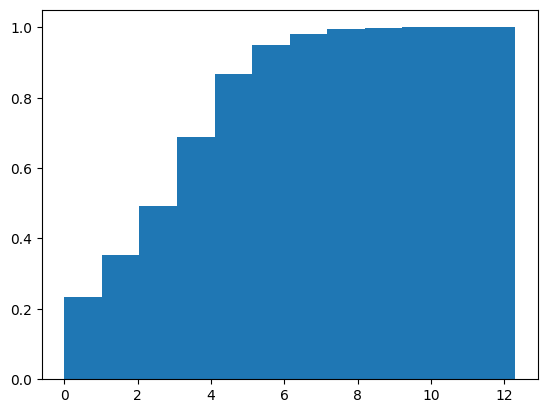

In [31]:
plt.hist(sample['logbacker'], bins= 12, density= True, cumulative= True)
plt.show()

# boxplot

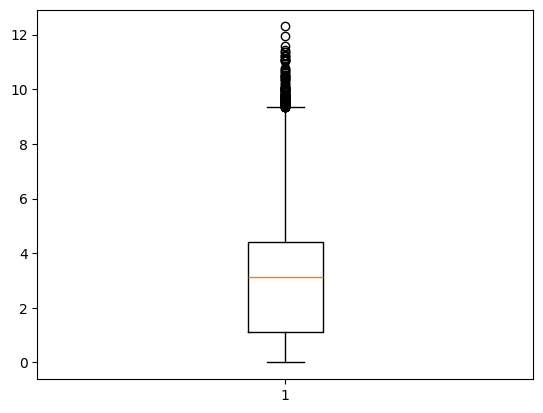

In [32]:
plt.boxplot(sample['logbacker'])
plt.show()

# scatter plot

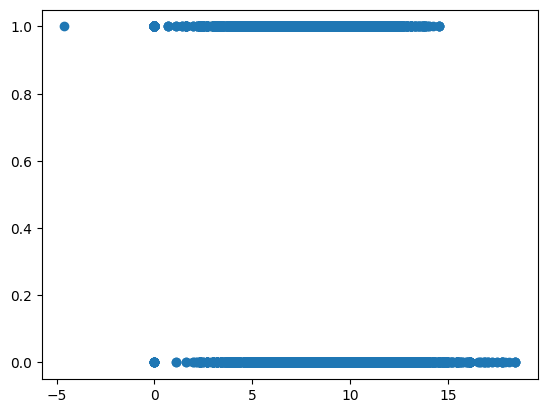

In [33]:
plt.scatter(sample['loggoal'], sample['numstatus'])
plt.show()

# bar chart

In [37]:
ratio = sample.groupby('Category')['numstatus'].mean()

ratio.sort_values(ascending=False, inplace=True)

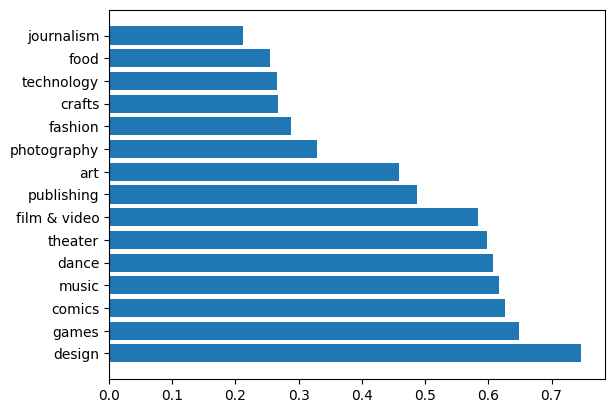

In [39]:
plt.barh(ratio.index, ratio)
plt.show()